In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as st 
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt 
import math
import statistics as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures 

In [21]:
data=pd.read_csv('logpost_U.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1] 
x=data.iloc[:,2]
z=data.iloc[:,3]

print(stats.stdev(x))
print(data)

0.38282919610965427
             A         B         C        D
0   106.092218  1.789340  45.48131  0.00300
1   114.110142  1.738364  44.56355  0.01184
2    67.115742  1.652795  44.48522  0.01201
3    71.672233  1.583762  44.94271  0.00330
4    90.909547  1.739032  44.85158  0.01119
..         ...       ...       ...      ...
66   52.631167  1.572969  44.73836  0.01216
67  107.433101  1.874277  44.70017  0.01567
68   44.077425  1.467471  44.99169  0.00923
69   67.595756  1.500005  45.37277  0.00411
70   87.227714  1.710899  44.99354  0.00965

[71 rows x 4 columns]


pendiente b1  -7.369998954857914
intercepción b0 is 452.07959224720605


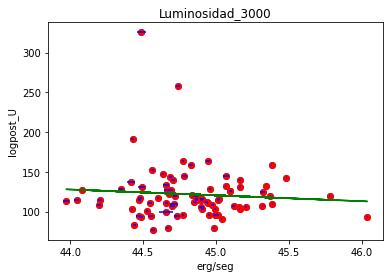

In [35]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('logpost_U')
plt.savefig("Luminosidad_3000_logpost_U.pdf")

In [23]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-0.04558374]
 [ 0.02357742]
 [ 1.        ]]
Intercepción: [80.07348937  0.70861521  0.        ]
Errorcuadratico medio : 301.1532061771683
Raiz del error cuadratico medio:  17.35376633982284
 Coeficiente de determinacion R2 :  0.3337139353834555


In [24]:
data=pd.read_csv('logpost_G.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1] 
x=data.iloc[:,2]
z=data.iloc[:,3]

print(stats.stdev(x))
print(data)

0.36818487906299635
             A         B         C        D
0   130.202316  1.949627  45.48131  0.00300
1   149.906770  2.918206  44.56355  0.01184
2   105.104500  1.736560  44.48522  0.01201
3    71.672233  1.583762  44.94271  0.00330
4   125.089477  2.485903  44.85158  0.01119
..         ...       ...       ...      ...
75   79.302025  2.318572  44.73006  0.02122
76  142.622398  2.060666  44.47789  0.01137
77  125.122405  1.571475  45.01247  0.01123
78  101.864754  1.809948  44.55196  0.01556
79  125.646016  1.640120  44.98618  0.00803

[80 rows x 4 columns]


pendiente b1  -7.369998954857914
intercepción b0 is 452.07959224720605


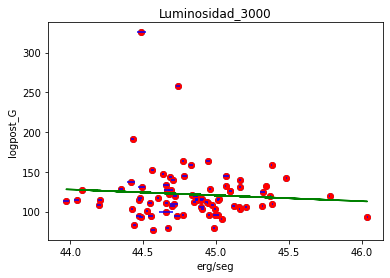

In [34]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('logpost_G')
plt.savefig("Luminosidad_3000_logpost_G.pdf")

In [27]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)


Pendiente : [[ 7.18086954]
 [-0.07971645]
 [ 1.        ]]
Intercepción: [-2.01911529e+02  5.66893975e+00  7.10542736e-15]
Errorcuadratico medio : 343.76072486688366
Raiz del error cuadratico medio:  18.540785443634356
 Coeficiente de determinacion R2 :  0.3372264752523944


In [28]:
data=pd.read_csv('logpost_R.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]

print(stats.stdev(x))
print(data)

0.3606475277861541
             A         B         C        D
0   154.399355  1.829780  45.48131  0.00300
1   150.212161  2.298551  44.56355  0.01184
2   109.168604  1.641570  44.48522  0.01201
3   117.038446  1.661915  44.94271  0.00330
4   131.885924  1.702738  44.85158  0.01119
..         ...       ...       ...      ...
79   71.170227  2.307091  44.98618  0.00803
80  158.449949  1.782129  45.06799  0.01807
81  137.917820  1.547206  44.86777  0.01203
82  106.393878  2.398750  44.71317  0.02774
83  119.673020  2.125404  44.93590  0.01085

[84 rows x 4 columns]


pendiente b1  -7.369998954857914
intercepción b0 is 452.07959224720605


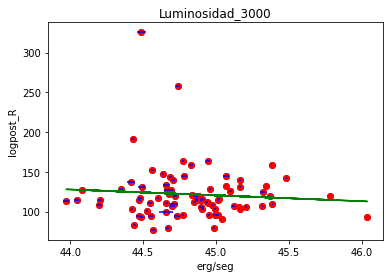

In [36]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('logpost_R')
plt.savefig("Luminosidad_3000_logpost_R.pdf")

In [37]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)


Pendiente : [[-7.36999895]
 [-0.02221907]
 [ 1.        ]]
Intercepción: [452.07959225   3.0945152    0.        ]
Errorcuadratico medio : 381.96489312875406
Raiz del error cuadratico medio:  19.543922153159382
 Coeficiente de determinacion R2 :  0.33543408810248704


In [38]:
data=pd.read_csv('logpost_I.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]

print(stats.stdev(x))
print(data)

0.3606475277861541
             A         B         C        D
0   141.824069  3.040497  45.48131  0.00300
1   151.780281  2.574591  44.56355  0.01184
2    92.614660  1.641891  44.48522  0.01201
3   110.824485  2.394953  44.94271  0.00330
4   112.537535  2.833369  44.85158  0.01119
..         ...       ...       ...      ...
79   79.807502  2.168904  44.98618  0.00803
80  144.270285  2.269053  45.06799  0.01807
81  114.551377  2.619182  44.86777  0.01203
82  109.263898  1.813485  44.71317  0.02774
83  111.509776  2.350403  44.93590  0.01085

[84 rows x 4 columns]


pendiente b1  -7.369998954857914
intercepción b0 is 452.07959224720605


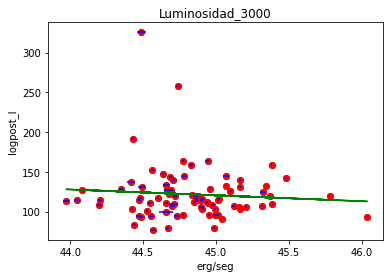

In [39]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('logpost_I')
plt.savefig("Luminosidad_3000_logpost_I.pdf")

In [40]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)


Pendiente : [[-7.36999895]
 [-0.02221907]
 [ 1.        ]]
Intercepción: [452.07959225   3.0945152    0.        ]
Errorcuadratico medio : 381.96489312875406
Raiz del error cuadratico medio:  19.543922153159382
 Coeficiente de determinacion R2 :  0.33543408810248704


In [41]:
data=pd.read_csv('logpost_Z.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]

print(stats.stdev(x))
print(data)

0.36818487906299635
             A         B         C        D
0   137.892281  1.687340  45.48131  0.00300
1   113.125078  1.561252  44.56355  0.01184
2    54.439427  1.585758  44.48522  0.01201
3    65.567099  1.576602  44.94271  0.00330
4   100.513633  1.802875  44.85158  0.01119
..         ...       ...       ...      ...
75   36.862623  1.729207  44.73006  0.02122
76  120.631785  1.557431  44.47789  0.01137
77  108.378965  1.522773  45.01247  0.01123
78   57.735250  1.645357  44.55196  0.01556
79   83.256750  1.383682  44.98618  0.00803

[80 rows x 4 columns]


pendiente b1  -0.31475340036347355
intercepción b0 is 99.69526337556748


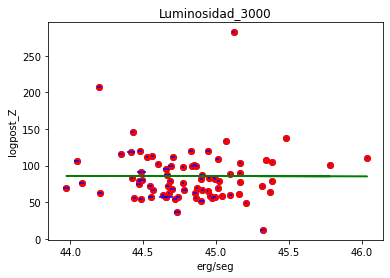

In [42]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('logpost_Z')
plt.savefig("Luminosidad_3000_logpost_Z.pdf")

In [43]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-0.3147534 ]
 [-0.25222899]
 [ 1.        ]]
Intercepción: [9.96952634e+01 1.30308320e+01 7.10542736e-15]
Errorcuadratico medio : 425.29812777291
Raiz del error cuadratico medio:  20.622757521071474
 Coeficiente de determinacion R2 :  0.3494436313757161
